In [1]:
import pandas as pd
%pylab inline
%ls Tablas

Populating the interactive namespace from numpy and matplotlib
SNLM_Tabla_Caudales_v3.csv          Tabla_NivFreat_LagunaMejia_v2.csv
SNLM_Tabla_Caudales_v3.xlsx         Tabla_NivFreat_LagunaMejia_v2.xlsx


In [2]:
#importamos los datos
DatosCaudalesTotales = pd.read_csv('Tablas/SNLM_Tabla_Caudales_v3.csv',index_col=0)
DatosCaudalesTotales.head()

,Este,Norte,Fecha,Qtotal (m3/s)
Aforo,,,,
Puntilla,196473,8103514,13/05/2016,0.193
Campesino,194248,8103536,13/05/2016,0.480
Centro de visitantes,193407,8104162,13/05/2016,0.425
Motobomba,192546,8104722,13/05/2016,0.696
Camanejos,197321,8100714,13/05/2016,0.169


In [3]:
#Cambiamos los encabezados
DatosCaudalesTotales = DatosCaudalesTotales.rename(columns={'Qtotal (m3/s)':'Caudal(m3/s)'})

#Solo nos quedamos con las fechas y niveles
DatosCaudal = DatosCaudalesTotales.iloc[:,[2,3]]
DatosCaudal.head()

,Fecha,Caudal(m3/s)
Aforo,,
Puntilla,13/05/2016,0.193
Campesino,13/05/2016,0.480
Centro de visitantes,13/05/2016,0.425
Motobomba,13/05/2016,0.696
Camanejos,13/05/2016,0.169


In [4]:
#identificamos una fecha
DatosCaudal['Fecha'] =  pd.to_datetime(DatosCaudal['Fecha'], format='%d/%m/%Y')
DatosCaudal['Fecha'].unique()[:10]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array(['2016-05-12T19:00:00.000000000-0500',
       '2016-04-14T19:00:00.000000000-0500',
       '2016-03-06T19:00:00.000000000-0500',
       '2016-02-14T19:00:00.000000000-0500',
       '2016-01-14T19:00:00.000000000-0500',
       '2015-12-12T19:00:00.000000000-0500',
       '2015-11-15T19:00:00.000000000-0500',
       '2015-10-11T19:00:00.000000000-0500',
       '2015-09-11T19:00:00.000000000-0500',
       '2015-08-10T19:00:00.000000000-0500'], dtype='datetime64[ns]')

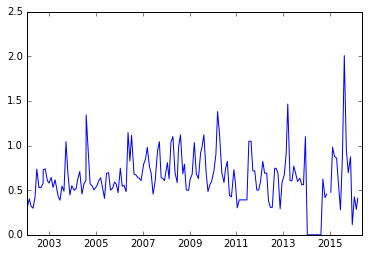

In [5]:
#Para Campesino
DatosCampesino = DatosCaudal.loc[DatosCaudal.index == 'Campesino'].sort_values(by='Fecha')
plot(DatosCampesino['Fecha'],DatosCampesino['Caudal(m3/s)'],label='Campesino')
#DatosCampesino

In [6]:
#Aguas Abajo: Para Campesino, Centro Visitantes y Motobomba
DatosCampesino = DatosCaudal.loc[DatosCaudal.index == 'Campesino'].sort_values(by='Fecha')
DatosCentroVisitantes = DatosCaudal.loc[DatosCaudal.index == 'Centro de visitantes'].sort_values(by='Fecha')
DatosMotobomba = DatosCaudal.loc[DatosCaudal.index == 'Motobomba'].sort_values(by='Fecha')

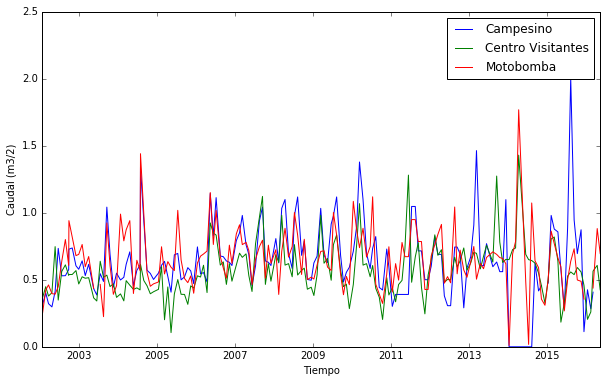

In [7]:
figsize(10,6)
plot(DatosCampesino['Fecha'],DatosCampesino['Caudal(m3/s)'],label='Campesino')
plot(DatosCentroVisitantes['Fecha'],DatosCentroVisitantes['Caudal(m3/s)'],label='Centro Visitantes')
plot(DatosMotobomba['Fecha'],DatosMotobomba['Caudal(m3/s)'],label='Motobomba')
xlabel('Tiempo')
ylabel('Caudal (m3/2)')
legend()
savefig('Caudales_Campesion_Centro_Visitantes_Motobomba')

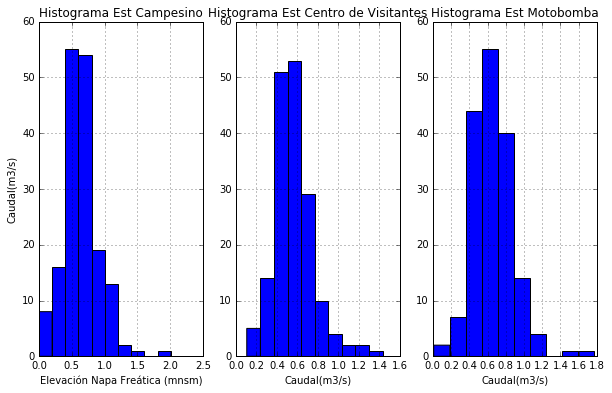

In [11]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
DatosCampesino['Caudal(m3/s)'].hist()
plt.title('Histograma Est Campesino')
plt.xlabel('Elevación Napa Freática (mnsm)')
plt.ylabel('Caudal(m3/s)')

plt.subplot(1, 3, 2)
DatosCentroVisitantes['Caudal(m3/s)'].hist()
plt.title('Histograma Est Centro de Visitantes')
plt.xlabel('Caudal(m3/s)')

plt.subplot(1, 3, 3)
DatosMotobomba['Caudal(m3/s)'].hist()
plt.title('Histograma Est Motobomba')
plt.xlabel('Caudal(m3/s)')

plt.show()
savefig('Histograma_Est_Campesino_Centro_Visitantes_Motobomba')

In [19]:
DatosCampesinoFecha = DatosCampesino.set_index('Fecha')
DatosCentroVisitantesFecha = DatosCentroVisitantes.set_index('Fecha')
DatosMotobombaFecha = DatosMotobomba.set_index('Fecha')
DatosCampesinoFecha_mensuales = DatosCampesinoFecha.groupby(lambda m: m.month)
DatosCentroVisitantesFecha_mensuales = DatosCentroVisitantesFecha.groupby(lambda m: m.month)
DatosMotobombaFecha_mensuales = DatosMotobombaFecha.groupby(lambda m: m.month)
DatosCampesinoFecha_mensuales.mean()

,Caudal(m3/s)
1,0.539667
2,0.610800
3,0.728267
4,0.630357
5,0.571714
6,0.535500
7,0.695077
8,0.852714
9,0.733714
10,0.617571


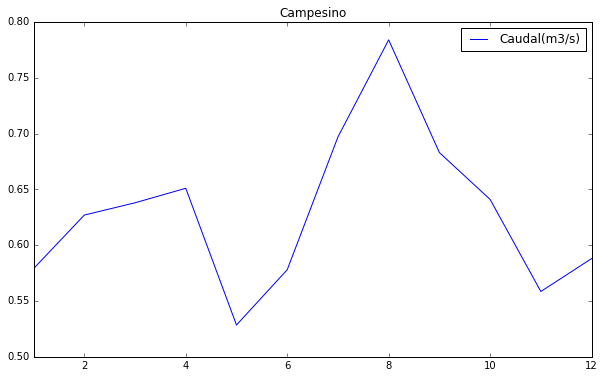

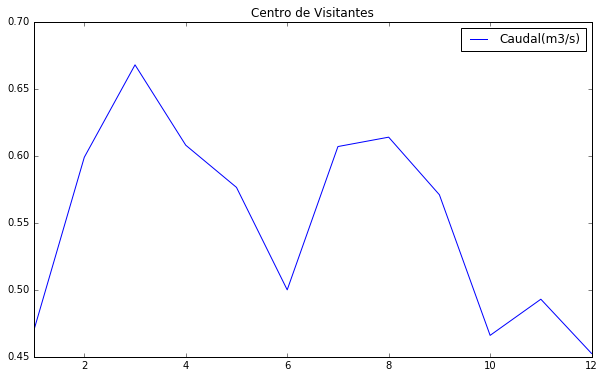

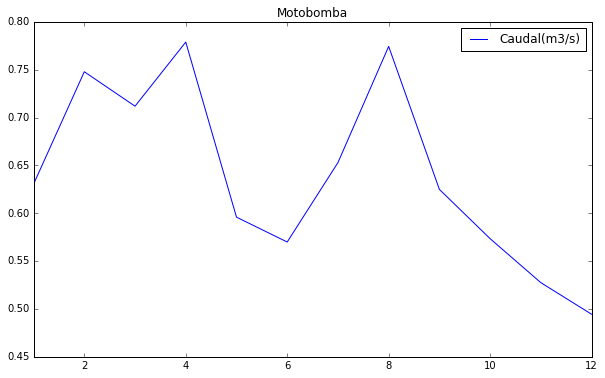

In [27]:
DatosCampesinoFecha_mensuales.median().plot(title='Campesino')
DatosCentroVisitantesFecha_mensuales.median().plot(title='Centro de Visitantes')
DatosMotobombaFecha_mensuales.median().plot(title='Motobomba')